In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

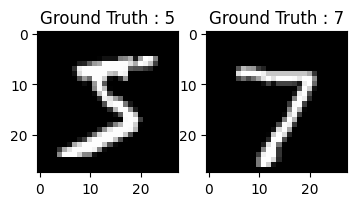

In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [6]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
## Normalize the data between 0–1 by dividing train data and test data with 255 then convert all labels into one-hot vector with to_catagorical() function.
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
model = Sequential()
# The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

In [ ]:
batch_size = 256
epochs = 50
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
model.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 202s 1s/step - loss: 2.0904 - accuracy: 0.2193 - val_loss: 1.8943 - val_accuracy: 0.2974
Epoch 2/50
196/196 [==============================] - 197s 1s/step - loss: 1.7689 - accuracy: 0.3517 - val_loss: 1.5978 - val_accuracy: 0.3978
Epoch 3/50
196/196 [==============================] - 199s 1s/step - loss: 1.5778 - accuracy: 0.4286 - val_loss: 1.4372 - val_accuracy: 0.4775
Epoch 4/50
196/196 [==============================] - 195s 994ms/step - loss: 1.4403 - accuracy: 0.4799 - val_loss: 1.4169 - val_accuracy: 0.4822
Epoch 5/50
196/196 [==============================] - 197s 1s/step - loss: 1.3330 - accuracy: 0.5222 - val_loss: 1.1954 - val_accuracy: 0.5677
Epoch 6/50
196/196 [==============================] - 196s 999ms/step - loss: 1.2505 - accuracy: 0.5546 - val_loss: 1.2147 - val_accuracy: 0.5680
Epoch 7/50
196/196 [==============================] - 196s 1s/step - loss: 1.1723 - accuracy: 0.5866 - val_loss: 1.2322 - val_accuracy: 

Text(0.5, 1.0, 'Loss Curves')

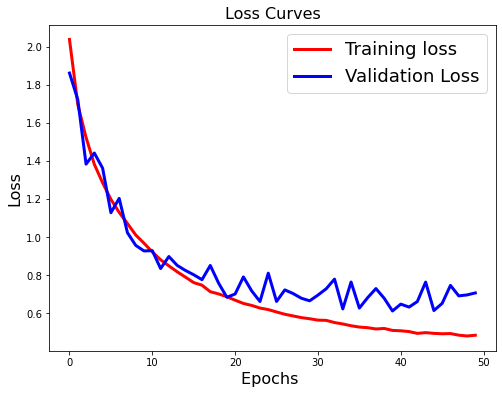

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

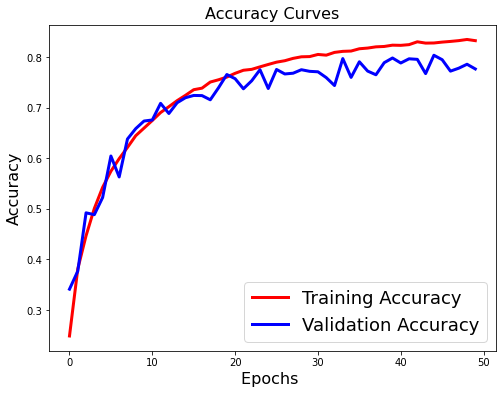

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
test_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_predict = model.predict(test_data, batch_size=batch_size)

40/40 [==============================] - 9s 191ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_predict = [np.argmax(x) for x in y_predict]

In [ ]:
print(classification_report(y_predict,test_labels))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       868
           1       0.87      0.94      0.90       923
           2       0.65      0.75      0.69       866
           3       0.52      0.70      0.60       745
           4       0.79      0.70      0.74      1129
           5       0.68      0.74      0.71       908
           6       0.95      0.64      0.76      1481
           7       0.78      0.88      0.82       887
           8       0.86      0.90      0.88       952
           9       0.94      0.76      0.84      1241

    accuracy                           0.78     10000
   macro avg       0.78      0.79      0.77     10000
weighted avg       0.80      0.78      0.78     10000

